In [1]:
import os
import pandas as pd
import missingno as msno

In [2]:
folder_path = "datasets"

df = pd.DataFrame()
for filename in os.listdir(folder_path):
    if "csv" in filename:
      df_ = pd.read_csv(os.path.join(folder_path,filename), index_col = 0)
      df = pd.concat([df, df_], ignore_index = True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34286 entries, 0 to 34285
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estilo      34286 non-null  object
 1   artist_url  34286 non-null  object
 2   song_url    34286 non-null  object
 3   lyrics      33650 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [4]:
df.describe()

,estilo,artist_url,song_url,lyrics
count,34286,34286,34286,33650
unique,9,2439,34240,33420
top,rok,https://acordes.lacuerda.net/andres_calamaro/,https://acordes.lacuerda.net/hermanos_abalos/a...,"(Adentro...)<br>Te vi, no olvidaré...<br>un ca..."
freq,16236,324,4,4


In [5]:
df.head()

,estilo,artist_url,song_url,lyrics
0,bal,https://acordes.lacuerda.net/alberto_cortez/,https://acordes.lacuerda.net/alberto_cortez/a_...,A MIS AMIGOS LES ADEUDO LA TERNURA<br>Y LAS PA...
1,bal,https://acordes.lacuerda.net/alberto_cortez/,https://acordes.lacuerda.net/alberto_cortez/a_...,A partir de mañana empezaré a vivir la mitad d...
2,bal,https://acordes.lacuerda.net/alberto_cortez/,https://acordes.lacuerda.net/alberto_cortez/am...,Yo puse el esfuerzo y ella la desgana<br>yo el...
3,bal,https://acordes.lacuerda.net/alberto_cortez/,https://acordes.lacuerda.net/alberto_cortez/am...,¿No sabes dónde puse mis anteojos?<br>me estoy...
4,bal,https://acordes.lacuerda.net/alberto_cortez/,https://acordes.lacuerda.net/alberto_cortez/ap...,apoya sobre mi hombro<br>tu cabellera de espum...


<Axes: >

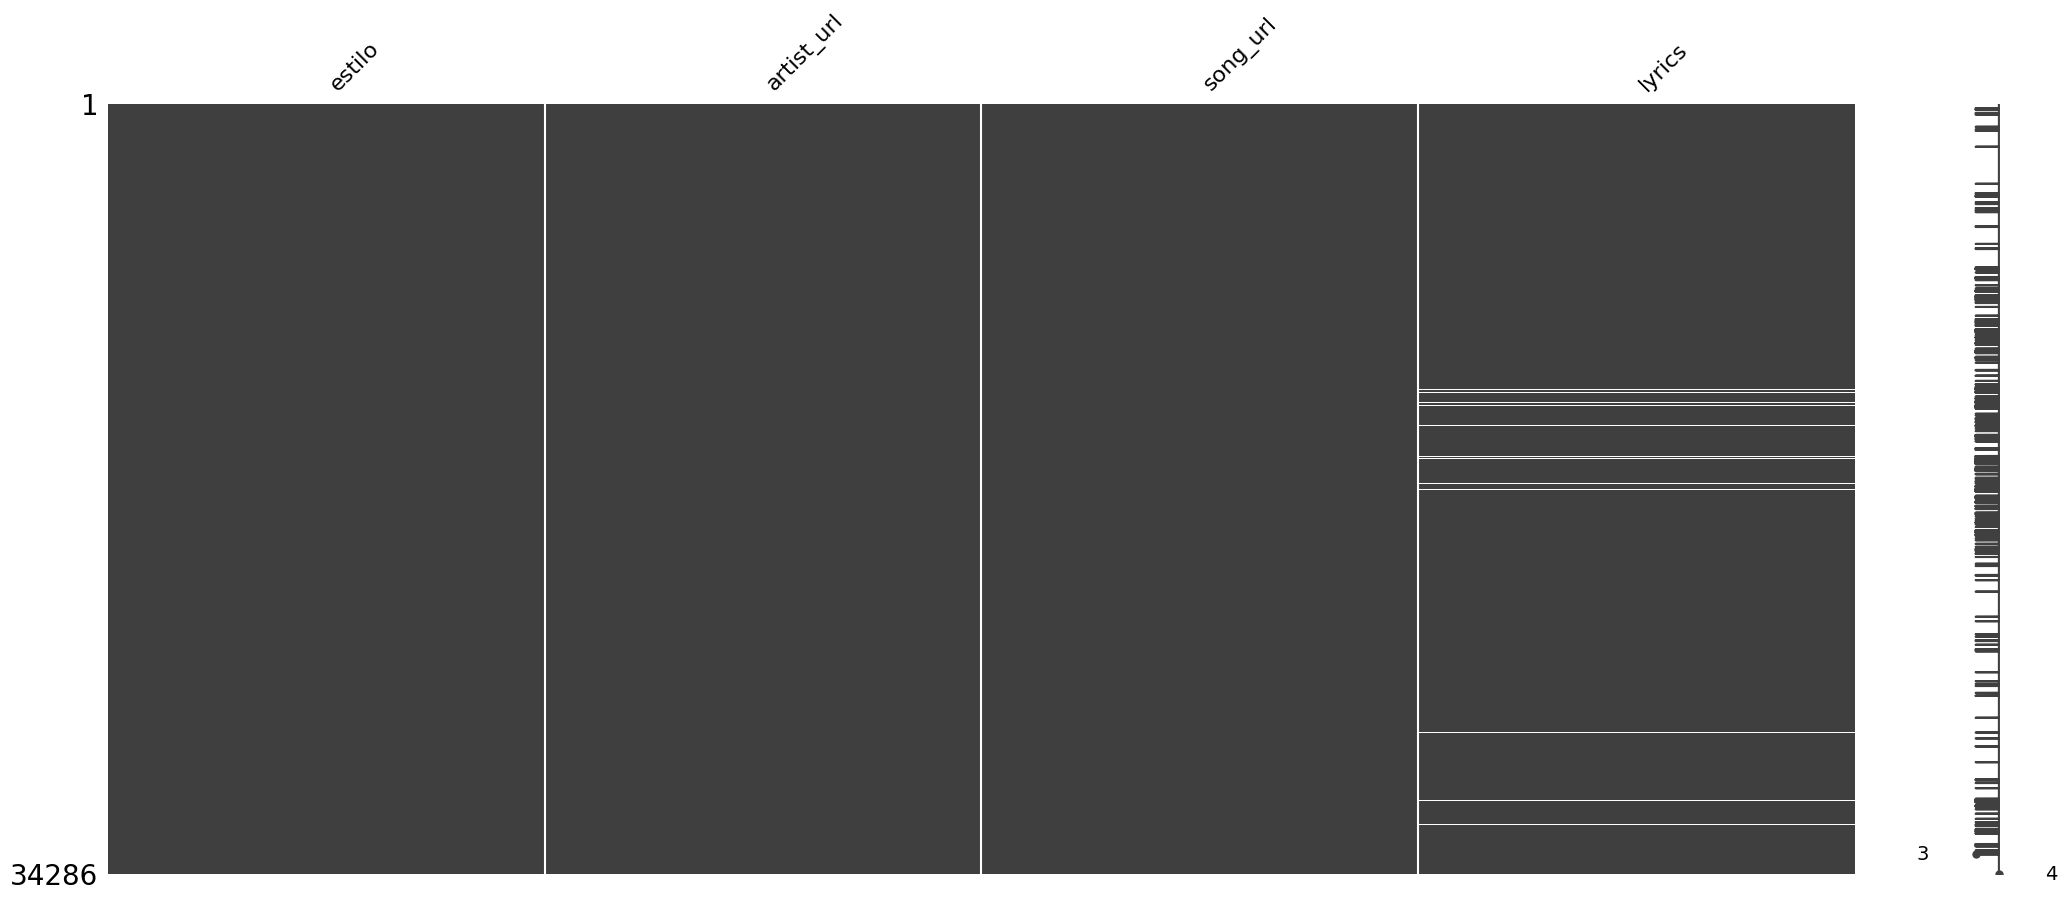

In [6]:
msno.matrix(df)

In [7]:
# ¿Hay canciones sin letra?
df.lyrics.isnull().sum()

636

In [32]:
# ¿Hay duplicados?
df.duplicated().sum()

46

In [47]:
df[df.duplicated()].head()

,estilo,artist_url,song_url,lyrics
3603,gru,https://acordes.lacuerda.net/hermanos_abalos/,https://acordes.lacuerda.net/hermanos_abalos/a...,"(Adentro...)<br>Te vi, no olvidaré...<br>un ca..."
3604,gru,https://acordes.lacuerda.net/hermanos_abalos/,https://acordes.lacuerda.net/hermanos_abalos/a...,"(Adentro...)<br>Te vi, no olvidaré...<br>un ca..."
3605,gru,https://acordes.lacuerda.net/hermanos_abalos/,https://acordes.lacuerda.net/hermanos_abalos/a...,"(Adentro...)<br>Te vi, no olvidaré...<br>un ca..."
3794,gru,https://acordes.lacuerda.net/rancheros/,https://acordes.lacuerda.net/rancheros/dame_ot...,Dame otra oportunidad<br>necesito verte una ve...
4553,pop,https://acordes.lacuerda.net/floricienta_y_su_...,https://acordes.lacuerda.net/floricienta_y_su_...,"Miro caer las gotas,<br>la lluvia en mi ventan..."


In [22]:
# Cantidad de artistas únicos
len(df.artist_url.unique())

2439

In [15]:
# Artistas más representados
df.artist_url.value_counts()[0:20]

artist_url
https://acordes.lacuerda.net/andres_calamaro/           324
https://acordes.lacuerda.net/chalchaleros/              283
https://acordes.lacuerda.net/fito_paez/                 272
https://acordes.lacuerda.net/sabroso/                   252
https://acordes.lacuerda.net/luis_a_spinetta/           247
https://acordes.lacuerda.net/carlitos_mona_jimenez/     246
https://acordes.lacuerda.net/charly_garcia/             231
https://acordes.lacuerda.net/manseros_santiaguenios/    212
https://acordes.lacuerda.net/attaque_77/                208
https://acordes.lacuerda.net/mercedes_sosa/             196
https://acordes.lacuerda.net/babasonicos/               196
https://acordes.lacuerda.net/chaquenio_palavecino/      189
https://acordes.lacuerda.net/nocheros/                  174
https://acordes.lacuerda.net/bersuit/                   168
https://acordes.lacuerda.net/pastillas_del_abuelo/      166
https://acordes.lacuerda.net/leon_gieco/                166
https://acordes.lacuerda.net/

In [14]:
# Análisis por estilo
estilos = df.estilo.unique()
df.estilo.value_counts()

estilo
rok    16236
tra     5983
tro     4231
can     2609
pop     2050
rel     1145
bal      973
rom      668
gru      391
Name: count, dtype: int64

In [45]:
estilo_dict = {
    "rok": "Rock",
    "tra": "Tradicional",
    "tro": "Tropical",
    "can": "Cantautor",
    "pop": "Pop",
    "rel": "Religioso",
    "bal": "Balada",
    "rom": "Romántico",
    "gru": "Grupero"
}

In [46]:
# Artistas más representados por estilo
for estilo in estilos:
    print(f"Top 5 artistas más representados de {estilo_dict[estilo]}:")
    print(' - '.join(df[df.estilo == estilo].artist_url.value_counts()[0:5].index).replace("https://acordes.lacuerda.net/", "").replace("/", ""))

Top 5 artistas más representados de Balada:
sandro - alberto_cortez - pimpinela - diego_verdaguer - kevin_johansen
Top 5 artistas más representados de Cantautor:
leon_gieco - axel_fernando - ignacio_copani - victor_heredia - piero
Top 5 artistas más representados de Grupero:
konga - rancheros - perota_chingo - hermanos_abalos - cachitas_now
Top 5 artistas más representados de Pop:
sandra_mihanovich - diego_torres - miranda - coti - ariel_rot
Top 5 artistas más representados de Religioso:
abel_pintos - puerto_seguro - claudio_freidzon - eduardo_meana - daniel_poli
Top 5 artistas más representados de Rock:
andres_calamaro - fito_paez - luis_a_spinetta - charly_garcia - attaque_77
Top 5 artistas más representados de Romántico:
leo_dan - marcela_morelo - lamas - violetta - leonardo_favio
Top 5 artistas más representados de Tradicional:
chalchaleros - manseros_santiaguenios - mercedes_sosa - chaquenio_palavecino - nocheros
Top 5 artistas más representados de Tropical:
sabroso - carlitos_mon